<a href="https://colab.research.google.com/github/nishabidla/Google-Colab/blob/main/digit_image_using_neural_network_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Opimizer SGD, RMSprop, etc

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential, model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

In [ ]:
batch_size =128
num_classes = 10
epochs = 2
#the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalise to 0 & 1 range
x_train /= 255
x_test /=255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


Label: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


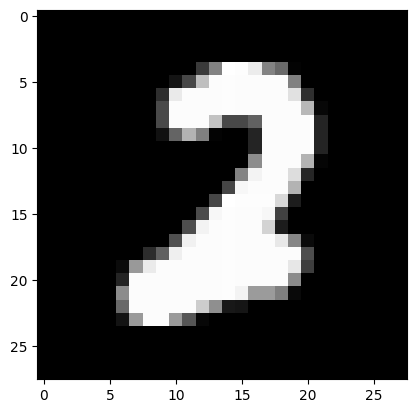

In [ ]:
print("Label:", y_test[199:200])
plt.imshow(x_test[199:200].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,))) #784 is because 28*28
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary() #Neurons,bias and approx weightage. Parameters 784*32+32 = 25120, 32*32+32=1056, 32*10+10=330

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27562 (107.66 KB)
Trainable params: 27562 (107.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Shape of First Layer
Visualisation of First Layer


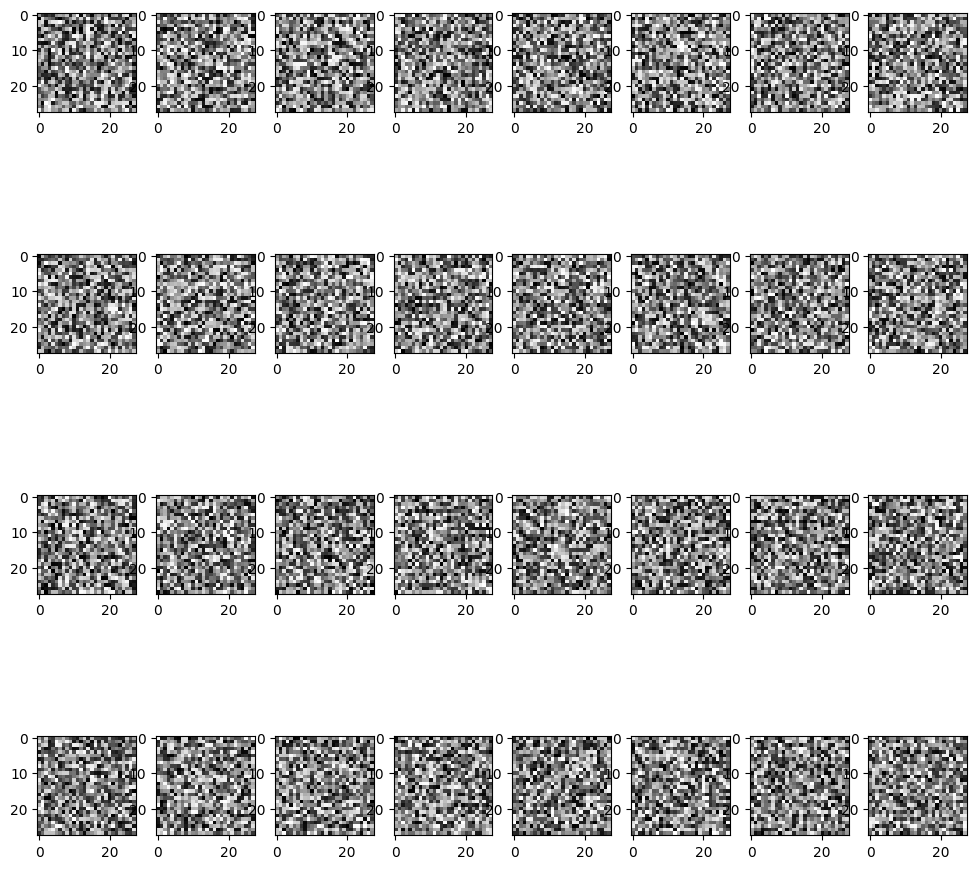

In [ ]:
#To check how the neurons looks (not necessary), no training so every

w =[]
for layer in model.layers:
  weights = layer.get_weights()
  w.append(weights)
layer1 = np.array(w[0][0])
print('Shape of First Layer')
print('Visualisation of First Layer')
fig=plt.figure(figsize=(12,12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
  fig.add_subplot(rows, columns,i)
  plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=4, #previously it was epochs= epochs and then we got accuracy of 87% in it
                    verbose=1)

Epoch 1/4
469/469 [==============================] - 2s 3ms/step - loss: 1.6796 - accuracy: 0.5022
Epoch 2/4
469/469 [==============================] - 1s 3ms/step - loss: 0.6915 - accuracy: 0.8323
Epoch 3/4
469/469 [==============================] - 1s 3ms/step - loss: 0.4144 - accuracy: 0.8912
Epoch 4/4
469/469 [==============================] - 1s 3ms/step - loss: 0.3099 - accuracy: 0.9158


In [ ]:
#Write the testing input and output variables
#previously it was epochs= epochs in previous step and then we got accuracy of 87% in it
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.2724973261356354
Test accuracy: 0.9272000193595886


Shape of First Layer
Visualisation of First Layer


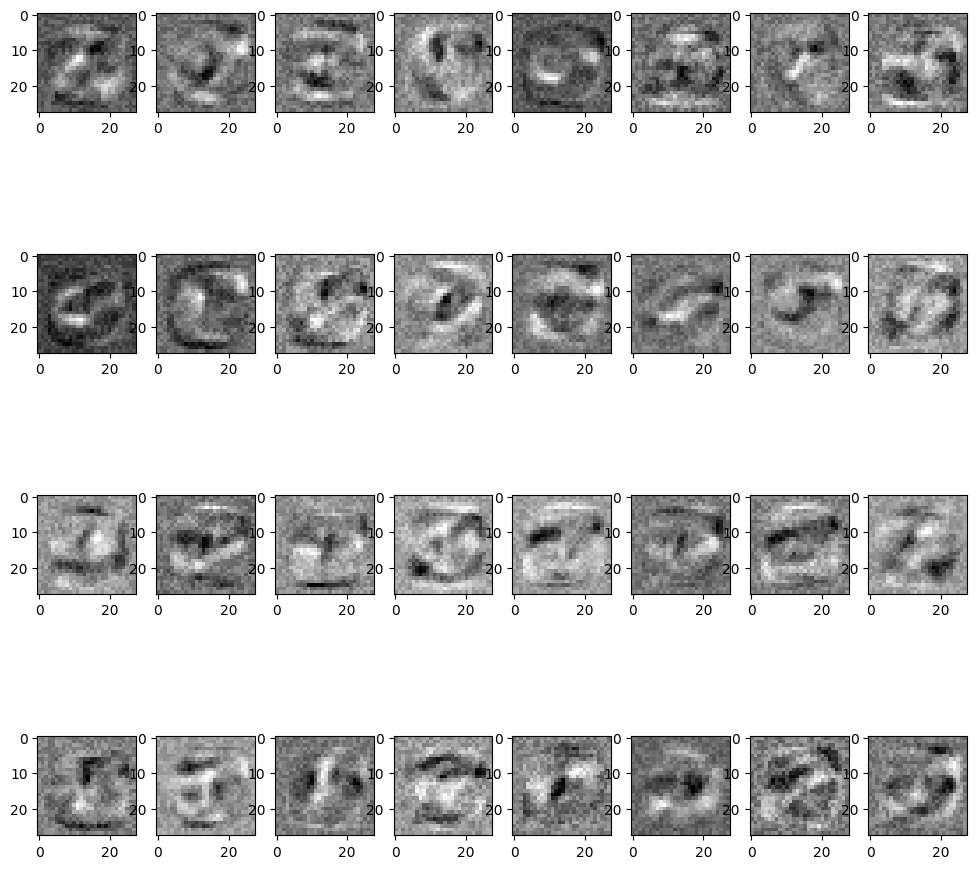

In [ ]:
w =[]
for layer in model.layers:
  weights = layer.get_weights()
  w.append(weights)
layer1 = np.array(w[0][0])
print('Shape of First Layer')
print('Visualisation of First Layer')
fig=plt.figure(figsize=(12,12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
  fig.add_subplot(rows, columns,i)
  plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

#We have done the same code previously and getting other images of neurons

In [ ]:
prediction = model.predict(x_test[199:200]) #199th image is tested
prediction = prediction[0]
print('Prediction\n', prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 381ms/step
Prediction
 [1.9398136e-05 4.9028960e-03 9.4033319e-01 1.6014664e-02 7.3940042e-05
 8.6466229e-04 6.9394596e-03 1.0358141e-05 3.0713640e-02 1.2774169e-04]

Thresholded output
 [0 0 1 0 0 0 0 0 0 0]


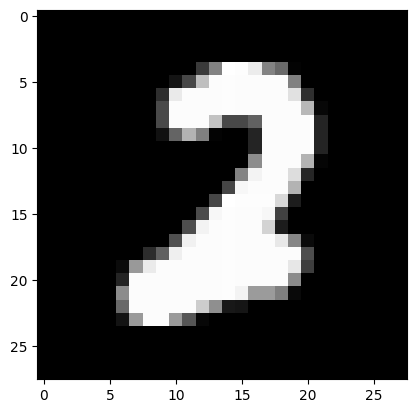

In [ ]:
plt.imshow(x_test[199:200].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
from google.colab import files
files.upload()

Saving Digit.jpeg to Digit (2).jpeg


{'Digit (2).jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\x90\x00\x90\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x02\x01\x01\x02\x02\x02\x02\x02\x02\x02\x02\x03\x05\x03\x03\x03\x03\x03\x06\x04\x04\x03\x05\x07\x06\x07\x07\x07\x06\x07\x07\x08\t\x0b\t\x08\x08\n\x08\x07\x07\n\r\n\n\x0b\x0c\x0c\x0c\x0c\x07\t\x0e\x0f\r\x0c\x0e\x0b\x0c\x0c\x0c\xff\xdb\x00C\x01\x02\x02\x02\x03\x03\x03\x06\x03\x03\x06\x0c\x08\x07\x08\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\xff\xc0\x00\x11\x08\x00\xe7\x00\xe7\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x

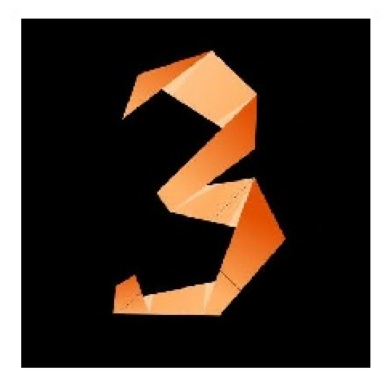

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Load image in color
image_bgr = cv2.imread('Digit.jpeg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)) #Convert BGR to RGB
plt.axis('off') #Turn off axis labels and ticks
plt.show()

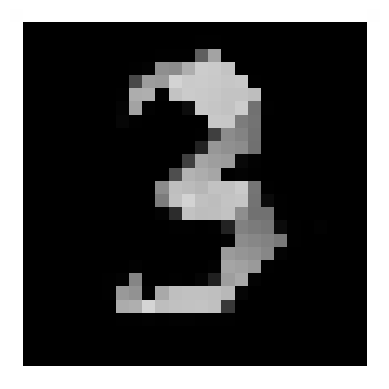

In [ ]:
image = cv2.imread('Digit.jpeg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image,(28,28))
#Show image
plt.imshow(image_resized, cmap= 'gray'), plt.axis("off")
plt.show()

In [ ]:
prediction = model.predict(image_resized.reshape(1,784))
print('prediction Score:\n', prediction [0])
thressholded = (prediction>0.5)*1
print('Thressholded score:\n', thressholded[0])
print('\nPredicted Digit:\n',np.where(thressholded ==1)[1][0])

1/1 [==============================] - 0s 77ms/step
prediction Score:
 [4.4376756e-07 1.4007937e-02 3.5458216e-03 9.7408241e-01 2.1554941e-07
 2.4341019e-03 8.7021017e-06 1.5422329e-04 5.5089323e-03 2.5705414e-04]
Thressholded score:
 [0 0 0 1 0 0 0 0 0 0]

Predicted Digit:
 3


In [ ]:
model_json = model.to_json()
# Write the file name of the model
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
# Write the file name of the weights
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
#load json and create model

# Write the file name of the model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
# Write the file name of the weights
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
469/469 [==============================] - 3s 5ms/step - loss: 0.2529 - accuracy: 0.9301
Epoch 2/2
469/469 [==============================] - 2s 5ms/step - loss: 0.2169 - accuracy: 0.9403
Test loss: 0.21486911177635193
Test accuracy: 0.9430999755859375
